#                                           Evaluation Project - 1

                                            Baseball case study



Name: P.Naga Suvarchala                        
    
Batch no: Ds0622
    
    
    


Problem Statement:-
    
This Dataset utilizes data from 2014 major league base ball seasons in order to develop an algorithm that predicts 

the no of wins for a given team in the 2015 season based on several different indicator of sucess. There are 15 features 

that will be used as inputs to the machine learning the output will be a value that represents the no of wins.

--Input features 

Runs -- AtBats -- Hits -- Doubles -- Triples -- Home runs -- Walks -- Strikeouts -- Stolen Bases -- Runs Allowed --

Earned Runs -- Earned Run Average -- Shutouts -- Saves -- Complete Games -- Errors

--Output Features

Number of predicted wins(W)

For downloading the dataset using the link given below

https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv
    

In [1]:
# let's Start with importing necessary librabries

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.linear_model import Ridge,Lasso,ElasticNet

from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')


# Importing Data:-

In [2]:
Dataset = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [3]:
Dataset.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Checking the Data type of each column

In [4]:
Dataset.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

# No need to change the Data types why because all in integer data types we can directly Jump to the Exploratory Data Analysis

In [5]:
Dataset.shape

(30, 17)

In [6]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# Checking Null values in Dataset

In [7]:
Dataset.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# There are no null values in Dataset we need to check the Duplicate values

In [8]:
# Checking the duplicate values

duplicate = Dataset[Dataset.duplicated()]
print("Duplicate Rows: ")

#print the Resultant Dataframe
duplicate

Duplicate Rows: 


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


# There is no Duplicate values in Dataset

In [9]:
#Checking the Discriptive Statistics in DataSEt

Dataset.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Discription of the variable

R: Runs

AB: AtBats
    
H: Hits
    
2B: Doubles
    
3B: Triples
    
HR: Homeruns
    
BB: Walks
    
SO: Strikeouts
    
SB: Stolen Bases
    
RA: RunsAllowed
    
ER:Earned Runs
    
ERA: Earned Run Average
    
CG: complete Game
    
SHO: ShutOut
    
SV :Save
    
E: Errors
    
W: win(Target variable)

# Exploratory DATA Analysis:-

In [10]:
def EDA (Dataset,i):
    plt.figure(figsize=(20,5),facecolor = '#FFCBA4')
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=Dataset,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i,y='W',data=Dataset)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=Dataset)
    plt.show()

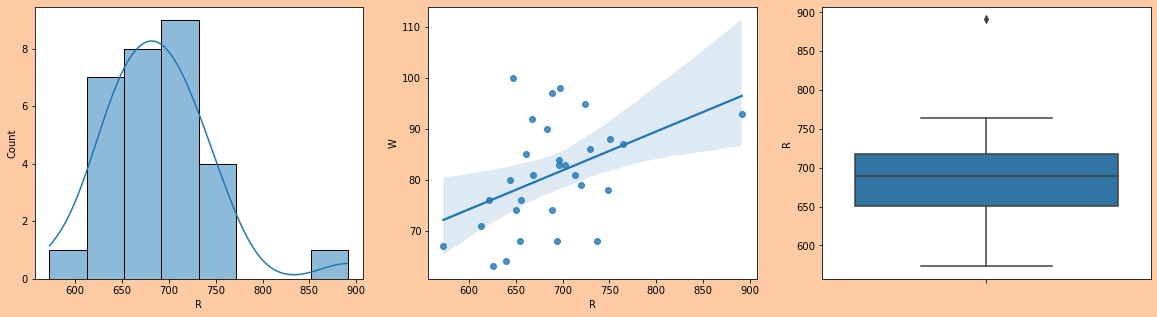

In [11]:
EDA(Dataset,'R')

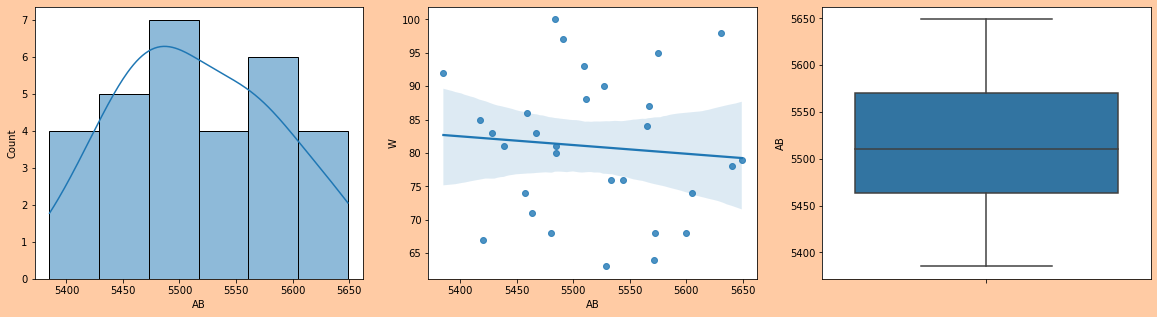

In [12]:
EDA(Dataset,'AB')

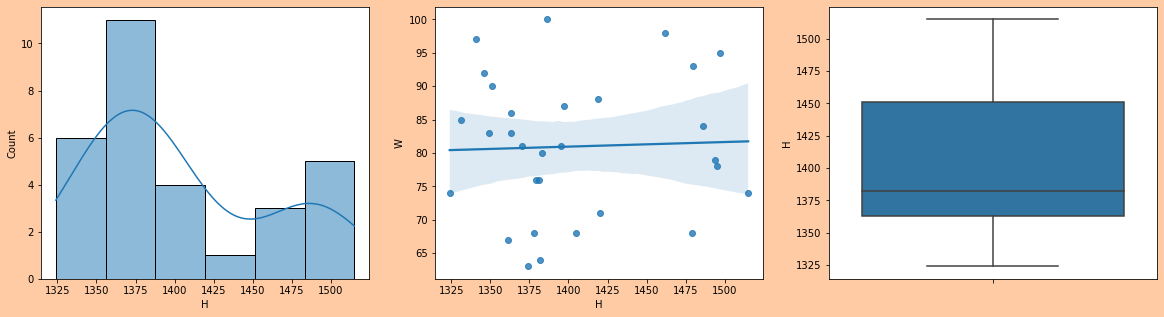

In [13]:
EDA(Dataset,'H')

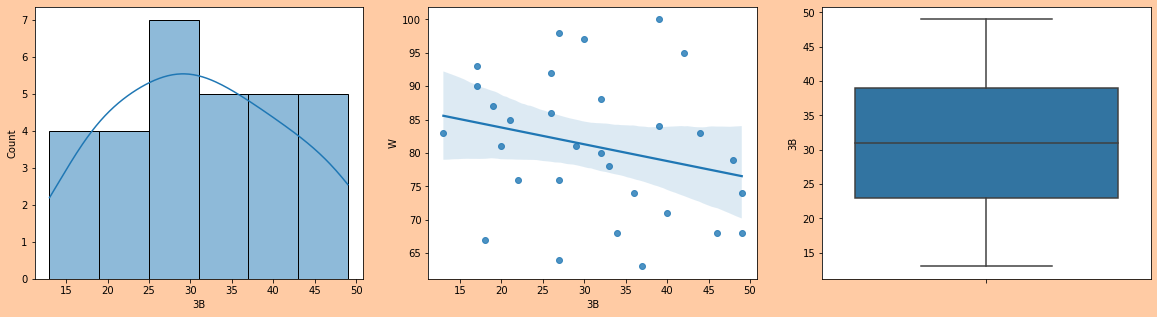

In [14]:
EDA(Dataset,'3B')

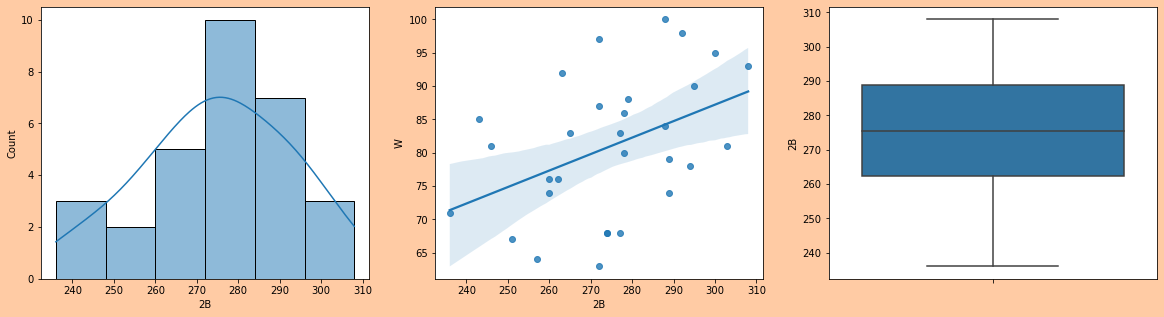

In [15]:
EDA(Dataset,'2B')

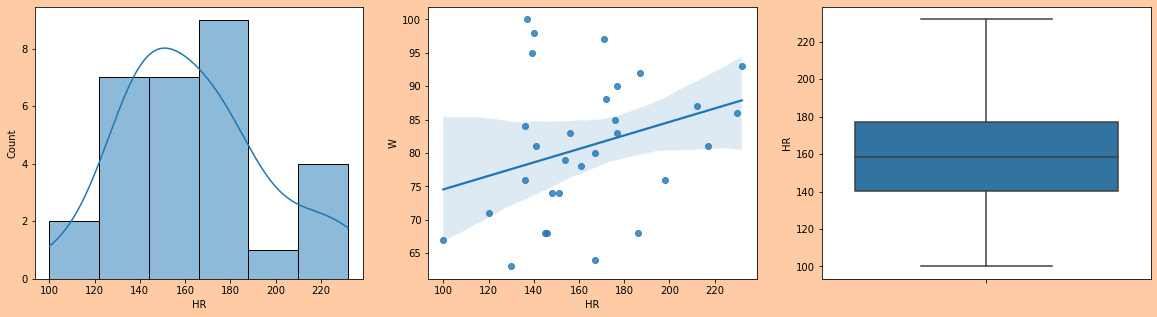

In [16]:
EDA(Dataset,'HR')

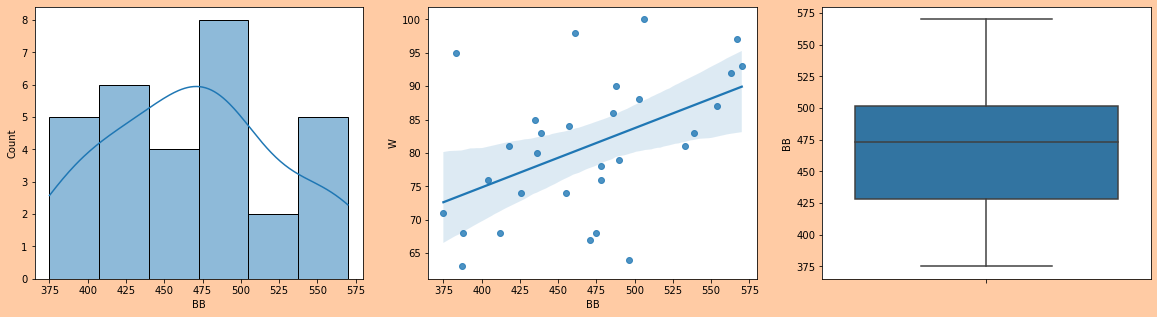

In [17]:
EDA(Dataset,'BB')

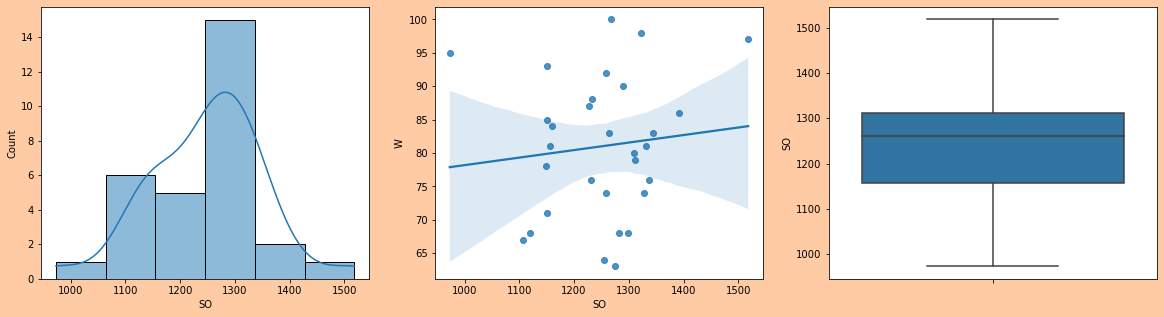

In [18]:
EDA(Dataset,'SO')

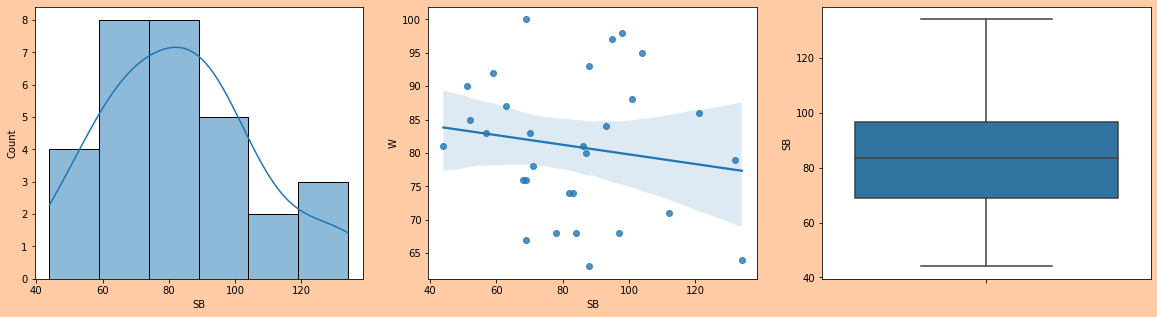

In [19]:
EDA(Dataset,'SB')

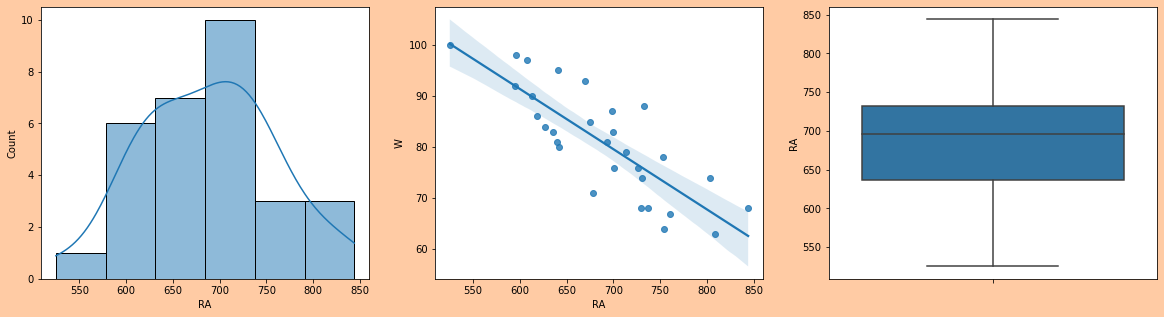

In [20]:
EDA(Dataset,'RA')

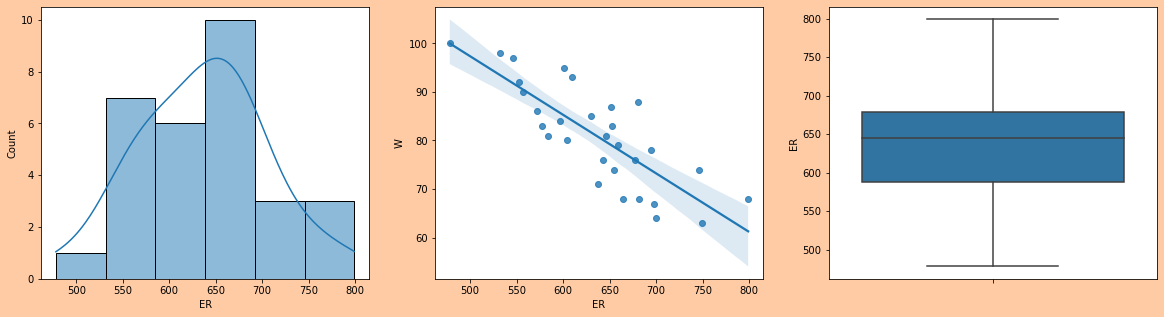

In [21]:
EDA(Dataset,'ER')

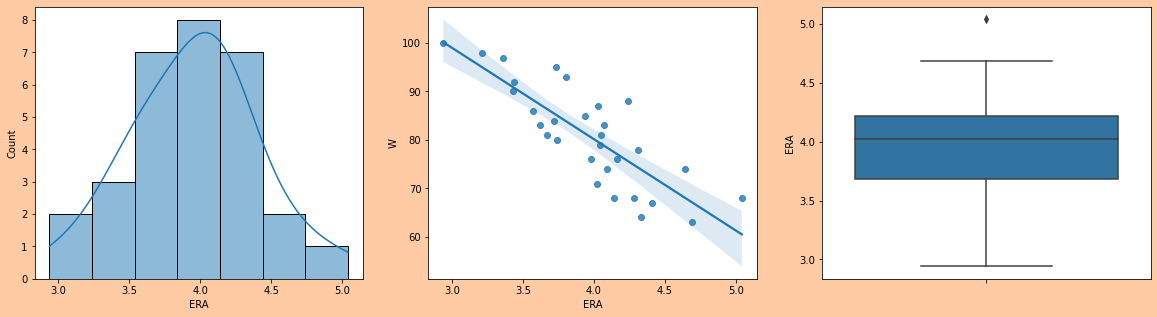

In [22]:
EDA(Dataset,'ERA')

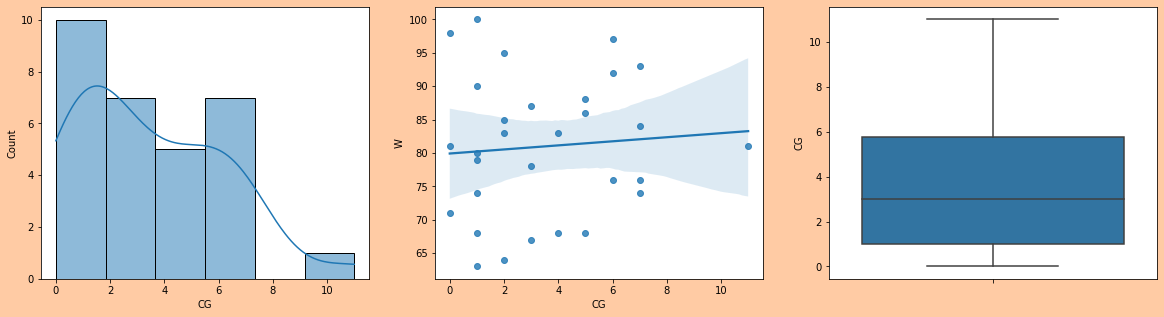

In [23]:
EDA(Dataset,'CG')

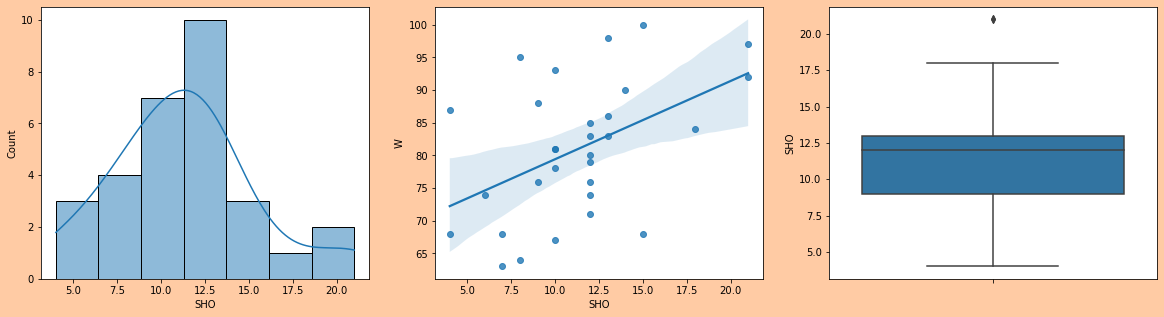

In [24]:
EDA(Dataset,'SHO')

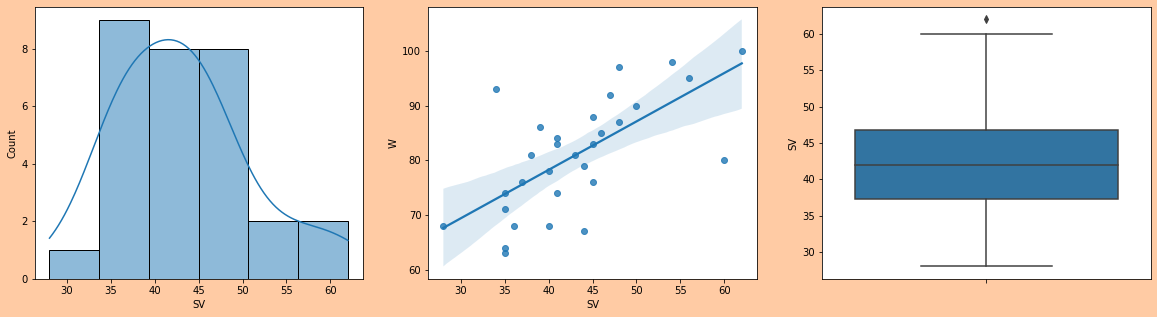

In [25]:
EDA(Dataset,'SV')

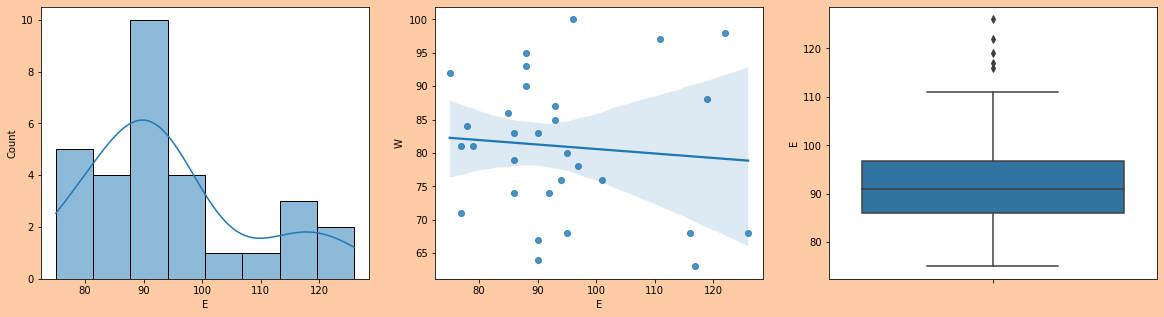

In [26]:
EDA(Dataset,'E')

# Now the numerical data has been analysed, it's time to give some explanation

The no of home runs, runs,doubles,shutouts, saves, walks are all strongly positively correlated

Stolen bases, Runs allowed,and earned runs are all highly negative linearly correlated

The other features have less linear correlation with no of wins

# Outlier treatment:-

Outliers are extreme values in data that are far from the majority of values. They can be seen as tiles in the histogram

Why should outliers be treated?

Outlier bias the training of machine learning models. As the algorithm tries to fit the extreme value, it deviates from 

the majority of the data


There are below 2 options to treat outlier in data

option -1: Delete the oulier records.Only if there are few rows lost

option-2: Impute the outlier values with a logical formula
    
    

# How to remove Outlier....?

The outlier can be removed the methods lisetd below

1)Z-Score method
2)IQR method

# Standardization.....

It is technique for transforming dataset into normal distribution. There are numerous methods for removing the skewness

1)Log - transformation

2)Square-root tranformation

3)Cube-root transformation

4)Reciprocal transformation

5)Box-cox transformation

6)Power transformation

7)square

8)cube

# Removing outliers by using z-score method

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(Dataset))
threshold=3
df1=Dataset[(z<3).all(axis=1)]
print("Percentage of loss of data by z score is:",(Dataset.shape[0]-df1.shape[0])/Dataset.shape[0])


Percentage of loss of data by z score is: 0.03333333333333333


# Seperating features and lables

In [28]:
f=df1.drop('W',axis=1)
l=df1.W

# Data Scaling with Standard Scaler

In [29]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scaled_feature=scalar.fit_transform(f)

In [30]:
scaled_feature.shape

(29, 16)

In [31]:
f.shape

(29, 16)

# Cheking the multi-collinearity in Dataset

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Finding variance inflation factor in each scaled column i.e X_scaled.shape[1](1/(1-R2)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(scaled_feature,i) for i in range(scaled_feature.shape[1])]
vif['Features']=f.columns
#vif must be done after scaling the data
#let's check the values
vif

,vif,Features
0,7.229564,R
1,18.333377,AB
2,10.558458,H
3,3.743423,2B
4,3.278636,3B
5,8.426403,HR
6,3.431971,BB
7,2.720640,SO
8,2.110804,SB
9,197.315706,RA


<AxesSubplot:>

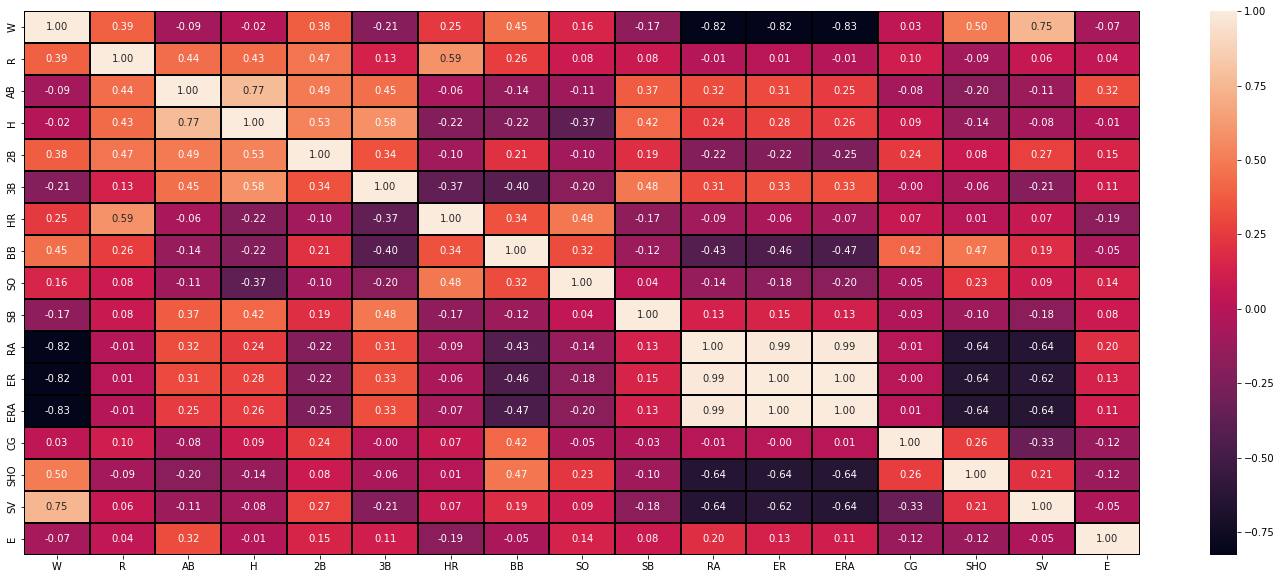

In [33]:
#plotting the heatmap
plt.figure(figsize=(25,10))

sns.heatmap(df1.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

# With the above diagram we can identify that some are highly correlated, some are negatively correlated 

With the following function we can select highly correlated features

In [34]:
def correlation(dataset,threshold):
    col_corr=set()  #Set of all names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:   #we are intersted in absolute co-efficent value
                colname = corr_matrix.columns[i] #getting the name of column
                col_corr.add(colname)
    return col_corr

In [35]:
corr_features = correlation(df1,0.5)
len(set(corr_features))

9

In [36]:
corr_features   # hightly correlated feature name

{'2B', '3B', 'ER', 'ERA', 'H', 'HR', 'RA', 'SHO', 'SV'}

# Correlation of columns with target column

In [37]:
#Finding correlation with target variable

df1.corr()['W'].sort_values()

ERA   -0.826952
RA    -0.823176
ER    -0.815308
3B    -0.206737
SB    -0.169503
AB    -0.085780
E     -0.072858
H     -0.018360
CG     0.029594
SO     0.156469
HR     0.245697
2B     0.384886
R      0.390451
BB     0.447513
SHO    0.497526
SV     0.749290
W      1.000000
Name: W, dtype: float64

<AxesSubplot:title={'center':'Correlation with Target'}>

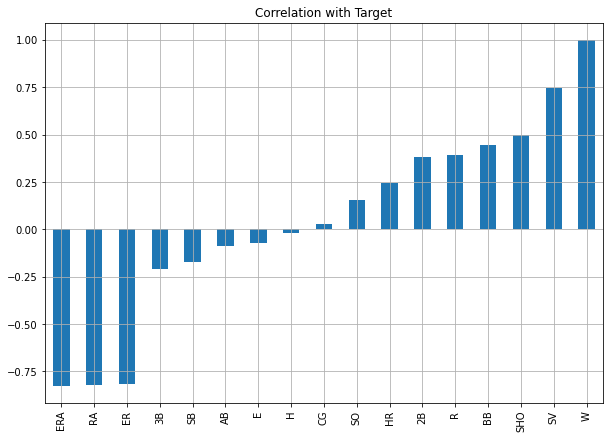

In [38]:
#Graphicla representation
df1.corr()['W'].sort_values().plot(kind='bar',grid=True,figsize=(10,7),title='Correlation with Target')

# Feature selection techniques

It is now best time to select he best columns(i.e features)that are related to Target variable.This can be accomplished 

directly by measuring correlation values or usinf ANOVA/Chi square-test.To get better sense of the data,it is always

helpful to visualize the relationship between the Target variable and each of the predictors.


The following techniques can be used to determine the relationship between two variables.

a)Continues Vs Continues -- Scatterplot

b)Categorical Vs Continues -- Boxplot

c)Categorical vs Categorical -- Grouped Barplots

Target variable is Continues hence following scenarios will be present

Continues Vs Continues---->Correlation matrix

Statistical feature selection (Continues Vs continues) using correlation matrix




----> The scatter plot will show a downward trend if the correlation between [-1,0].

----> Correlation between (0,1) denotes a direct proportional relation ship.The scatter plot will indicate an upward trend

----> Correlation {0} means no relationship. The scatter plot will show no discernable trend.

*****IF the magnitude of the correlation between two variables is greater than 0.5,it denotes a favourable relationship

*****We observed that the relationship between features and label to determine which columns are relavent to target variable

# Removing multi correlated features and selecting only final features

In [39]:
# Selecting best and important features

f  =  df1.drop(columns=['W','AB','H','3B','SO','SB','RA','ER','CG','E'],axis=1)

#L for lable

l=df1.W

In [40]:
scaler = StandardScaler()
scaled_feature = scalar.fit_transform(f)

In [41]:
#After droping correlated features check VIF again
#Finding variance inflation factor in each scaled column i.e X_scaled.shape[1](1/(1-R2))

vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(scaled_feature,i) for i in range(scaled_feature.shape[1])]
vif["Features"] = f.columns

#vif must be done after scaling the data
#let's check the values

vif

,vif,Features
0,2.925754,R
1,2.155338,2B
2,2.475624,HR
3,1.684869,BB
4,3.257540,ERA
5,2.052548,SHO
6,1.954878,SV


# Spliting data into Train and Test

In [42]:
maxAccu=0
lrm=LinearRegression()
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(scaled_feature,l,test_size=0.3,random_state=i)
    lrm = LinearRegression()
    lrm.fit(x_train,y_train)
    pred = lrm.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('The best Accuracy is ',maxAccu,'on random state',maxRs)

The best Accuracy is  0.9648474191608399 on random state 30


In [43]:
x_train,x_test,y_train,y_test=train_test_split(scaled_feature,l,test_size=0.3,random_state=30)

In [44]:
lrm = LinearRegression()
lrm.fit(x_train,y_train)

LinearRegression()

In [45]:
Dataset.tail(2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


# Predict the chance of win given features

In [46]:
#since we have already fit the scaler you can transform the data

print('Chance of win is ',lrm.predict(scalar.transform([[650,260,148,426,4.09,6,41]])))

Chance of win is  [73.44857898]


In [47]:
#Adjusted R2 Score # .score is nothing but adjusted R2 score
# when we have multiple feature that time we check adjusted R2 score

print('Model accuracy score on training data------>',lrm.score(x_train,y_train))
print('Model accuracy score  on testing data------>',lrm.score(x_test,y_test))

Model accuracy score on training data------> 0.8820353239373457
Model accuracy score  on testing data------> 0.9648474191608399


# Now the model performance is 88% for training dataset and 96% for the test data set

In [48]:
y_pred=lrm.predict(x_test)
y_pred

array([96.31928334, 73.44857898, 86.32076715, 85.44611395, 61.15502141,
       92.04634087, 80.91297443, 81.6268045 , 89.9487725 ])

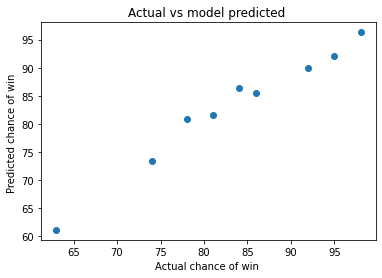

In [49]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of win ')
plt.ylabel('Predicted chance of win ')
plt.title('Actual vs model predicted ')
plt.show()

# Model evaluation metrics for linear regression

1) Residuals

2)Mean absolute Error

3)Mean square Error

4)Root mean square Error

5)R-squared or adjusted R-squared 

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [51]:
y_pred = lrm.predict(x_test)


In [52]:
print('mean_absolute_error is ---->',mean_absolute_error(y_test,y_pred))
print('mean_squred_error is---->',mean_squared_error(y_test,y_pred))
print('mean_square_error is---->',np.sqrt(mean_squared_error(y_test,y_pred)))

mean_absolute_error is ----> 1.7218261132018569
mean_squred_error is----> 3.7817233263264303
mean_square_error is----> 1.944665350729125


Let's see if our model is overfitting our training data

Regularization

1)It is a technique that are use to calibrate Machine learning model

2)It is technique to prevent the model from overfitting by adding extra information to it.

3)It is a technique that used to fix overfitting probelms

Types of Regularization

1)Lasso(Least absolute shrinkage and selection operator)/L1 form

2)Ridge(L2 form)

In [53]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

# Lasso

In [54]:
# LassoCV will return best alpha after max iteration

# Normalize is subtracting the mean and dividing by  the L2-norm

lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)

lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

# Best alpha parameters and Best learning rate

In [55]:
#best alpha parameter/best learning rate

alpha = lasscv.alpha_
alpha

0.10539793245946863

# Now that we have best parameter,let's use Lasso regression and see how well our data has fitted before

In [56]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.10539793245946863)

# Let's check Lasso Regression score

In [57]:
lasso_reg.score(x_test,y_test)

0.9629282888396354

# Using Ridge Regression model

#Ridge CV will return best alpha and co efficients after performing 10 cross validations

In [58]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [59]:
ridgecv.alpha_

0.071

In [60]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.071)

In [61]:
ridge_model.score(x_test,y_test)

0.9645058001749305

Conclusion: WE got around same r2 score using Ridge Regression as well. So it's safe to say there is no overfitting
    
    1) lasso_reg.score
    
    2)ridge_model.score
    
    3)regression.score
    
So we can see by  using different type of regularization, we still are getting the same r2 score. That means our OLS model

has been well trained over the training data and there is no overfitting

# We can save the model and later we can use it for prediction

In [62]:
import pickle

In [63]:
#Saving the model to the local file system
pickle.dump(lrm,open('lrm_model','wb'))